# <b> <span style="font-weight: 650; font-size: 52px;"> ASL CLASSIFICATION </span></b>

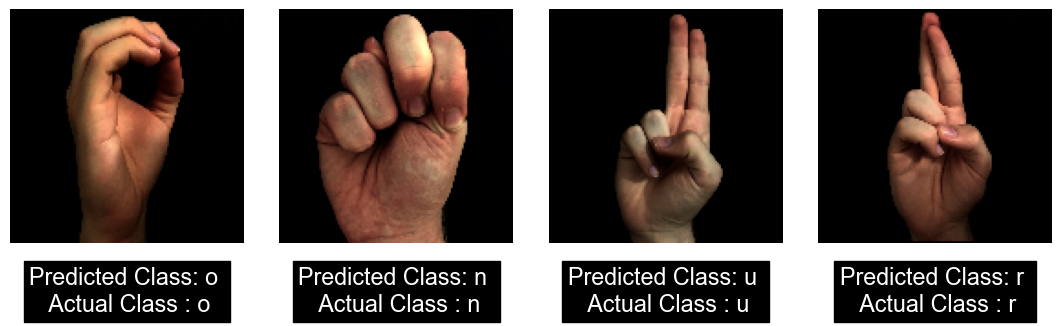

## <b> <span style="font-weight: 500; font-size: 40px;">  Setting up the Necessesities for the Data Creation and Efficent Model Training </span></b>


$$ \hspace{1.2cm}  $$

  * Importing Libraries which I will use 
  
  * Setting up the GPU for efficent usage

  * Setting up the variables that will be used for dataset creation and model training in the long run



$$ \hspace{1.5cm}  $$
## <b> <span style="font-weight: 500; font-size: 40px;">  Creating and Preprocessing the Dataset </span></b>
  $$ \hspace{1.2cm}  $$
  
  * Creating dataset with tensorflow
  
  * Preprocessing the dataset for efficent model training

  * Splitting the datasets to the train, test and validation datasets 

$$ \hspace{1cm}  $$
## <b> <span style="font-weight: 500; font-size: 40px;">  Data Visiulization </span></b>
  $$ \hspace{1.2cm}  $$
  
  * Plotting the distrubitions of the datasets' classes
  
  * Visiulizing the images and classes of the datasets

$$ \hspace{1cm}  $$

## <b> <span style="font-weight: 500; font-size: 40px;">  Finding Best Hyperparameters and Creating the Model Architecture </span></b>
$$ \hspace{1.2cm}  $$
  
  * Preparing the dataset for efficent model training
  
  * Finding the best hyperparameters and the best model architecture in  
  the possible model architecture range  that I specified

  * Visiualizing the best architecture and hyperparameters


$$ \hspace{1cm}  $$

## <b> <span style="font-weight: 500; font-size: 40px;"> Model Training </span></b> 

  * Training the model with the hyperparameters which I found
  * Saving the model 

$$ \hspace{1cm}  $$

## <b> <span style="font-weight: 500; font-size: 40px;"> Testing the Model and Visiualizing the Model Accuracy </span></b>

* Testing the model on the test dataset 
* Visiulizing the accuracy of the model on the test data
* Testing the model on the real word examples

$$ \hspace{1cm}  $$

# <b> <span style="font-weight: 500; font-size: 40px;">  Setting up the Necessesities for the Data Creation and Efficent Model Training </span></b>

In [1]:
# Importing Libraries 

# For training the model
import tensorflow as tf 
import keras_tuner
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow.keras.layers as layers

# For visualizations
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt 
%matplotlib inline

# Other necessary libraries
import os
import random

In [2]:
# For checking  TensorFlow GPU access
print(f'TensorFlow has access to the following devices:\n{tf.config.list_physical_devices()}')
# For getting tensorFlow version
print(f"TensorFlow version: {tf.__version__}")

TensorFlow has access to the following devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorFlow version: 2.12.0


In [3]:
# Adjusting the GPU growth for more efficent use 
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
len(gpus),gpu

(1, PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'))

In [4]:
# Setting a constant seed for getting same result every time
seed = 42

# For efficent model training it should be applied to the data
AUTOTUNE = tf.data.experimental.AUTOTUNE 

# Image adjustments
image_height = 128
image_weight = 128

# Size of each batch
batch_size = 32

# Dataset path
path ='/Users/onurdursun/Downloads/asl_dataset'

$$ \hspace{1.2cm}  $$
$\Rightarrow$ There are seperate 2 datasets. 
Firstly, they should be collected and concataneted, 
then splitted to the train, test and validation datasets.

In [5]:
# Creating dataset1 with wanted attributes(such as image size and batch size), shuffling for getting faster model training
# (because if it isn't done that causes confusion for the model since model will be trained with same class over and over again)
# and predicating a seed for getting the same results at every time as I mentioned earlier

dataset1 = tf.keras.preprocessing.image_dataset_from_directory(
    f'{path}',
    batch_size = batch_size,
    image_size =(image_height,image_weight),
    shuffle = True,
    seed = seed,
    )

Found 2515 files belonging to 36 classes.


In [6]:
# Collecting the class names for longtime usage
class_names = dataset1.class_names
class_names[:15]

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e']

In [7]:
# Collecting the class length for longtime usage
num_classes = len(class_names)
num_classes

36

In [8]:
# Creating dataset2 with same configurations
dataset2 = tf.keras.preprocessing.image_dataset_from_directory(
    f'{path}_2',
    batch_size = batch_size,
    image_size =(image_height,image_weight),

    shuffle = True,
    seed = seed,
    )

Found 2515 files belonging to 36 classes.


In [9]:
# Creating the combined_dataset to handle the whole dataset with one variable
combined_dataset = dataset1.concatenate(dataset2)

In [10]:
# Informations about combnined_dataset
combined_dataset

<_ConcatenateDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
# Determining the size of the combined_dataset
dataset_size = tf.data.experimental.cardinality(combined_dataset).numpy()

# Determineing the sizes of  train and test datasets
train_size = int(0.8 * dataset_size)  # 80% for training
test_size = int(0.2 * dataset_size)  # 20% for testing

# Creating the train and test datasets
train_dataset = combined_dataset.take(train_size)
test_dataset = combined_dataset.skip(train_size)

In [12]:
# Determineing the size of validation dataset with using the cardinality of the train dataset
val_size = int(0.2*tf.data.experimental.cardinality(train_dataset).numpy())#train_dataset's 20% is for testing

# Creating validation dataset and adjusting the train_dataset after taking some data from train_dataset
val_dataset = train_dataset.take(val_size)
train_dataset = train_dataset.skip(val_size)

In [13]:
# Datasets' cardinalities
tf.data.experimental.cardinality(train_dataset), tf.data.experimental.cardinality(test_dataset), tf.data.experimental.cardinality(val_dataset)

(<tf.Tensor: shape=(), dtype=int64, numpy=101>,
 <tf.Tensor: shape=(), dtype=int64, numpy=32>,
 <tf.Tensor: shape=(), dtype=int64, numpy=25>)

$$ \hspace{1.2cm}  $$
# <b> <span style="font-weight: 500; font-size: 40px;">  Creating and Preprocessing the Dataset </span></b>
$$ \hspace{1.2cm}  $$


$$ \hspace{1.2cm}  $$
$\Rightarrow$ There are seperate 2 datasets. 
Firstly, I will plot the classes' distribution for investigating the class imbalance

In [14]:
def plot_class_distribution(dataset, class_names):

    '''
    Summary :
    
        Plots the distribution of the classes

    Args    :

        dataset(tf.data.Dataset)         : Dataset to visiulize it's classes' distribution
        class_names(list or numpy array) : Name of the classes or labels of the images
        
    Returns :
    
        Seaborn count plot that visiulizes distribution of the classes
    '''
    # Creating the figure
    plt.figure(figsize=(8,6))
    
    # Extracting the labels from the batches with the list comprehension
    labels = np.concatenate([batch[1] for batch in dataset], axis=0)

    #Creating a pandas dataframe having a column which is 'classes' to store the classes' indexes with pouring the labels into the columns
    df = pd.DataFrame(labels, columns = ['Classes'])
    # Changing the class indexes with class names with indexing class_names and mapping them into 'classes' column.
    df['Classes'] = df['Classes'].map({i : class_names[i] for i in range(num_classes)})

    # Creating plot's color pattern
    cmap = plt.get_cmap('cubehelix')
    # Adjusting the change dynamic of the colors'
    colors = cmap(np.linspace(0, 0.7, num_classes))
    #Creating the countplot with the value counts of 'Classes' column.
    ax = sns.countplot(x=df['Classes'],palette=colors, saturation=3)
    #Adjusting the x-axis's values' position
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    # Automatically adjust the spacing and dimensions of the subplots to improve readability and aesthetics.
    plt.tight_layout()
    #Displaying the plot
    plt.show() 

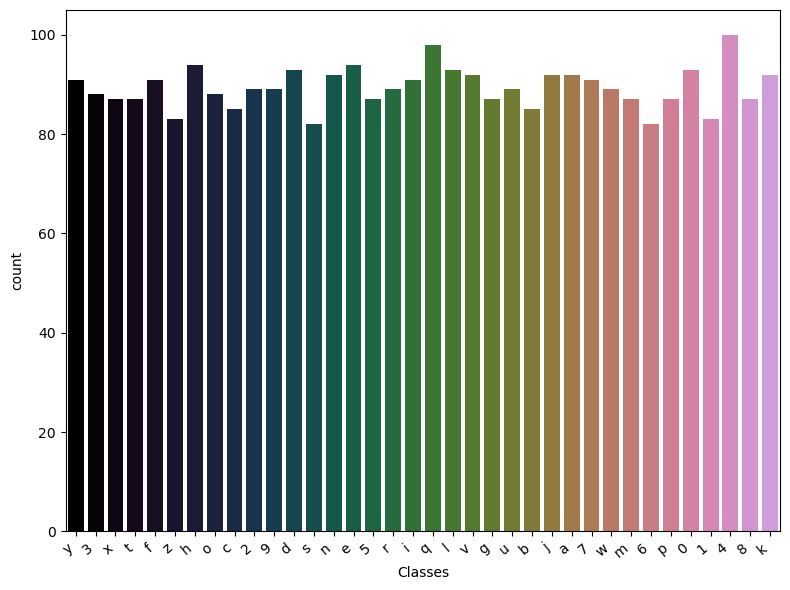

In [102]:
# Distribution of train_dataset classes
plot_class_distribution(train_dataset,class_names)

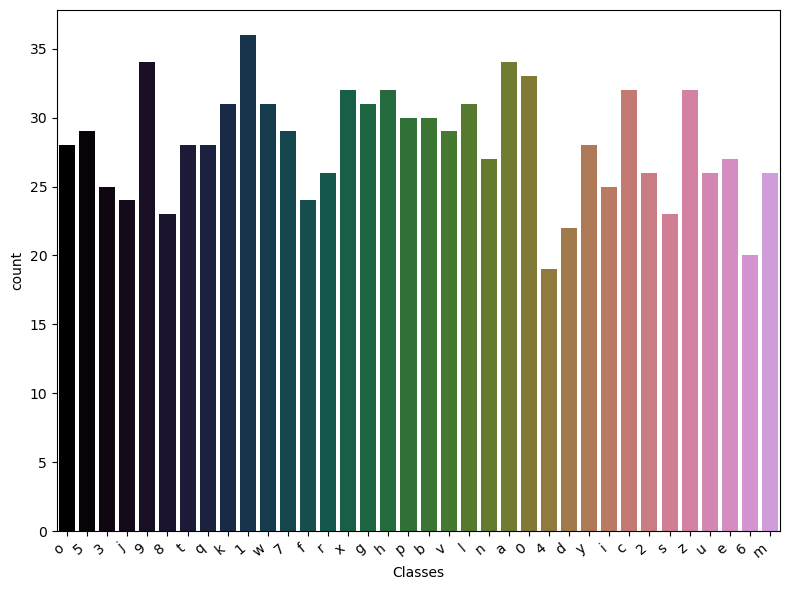

In [103]:
# Distribution of test_dataset classes
plot_class_distribution(test_dataset, class_names)

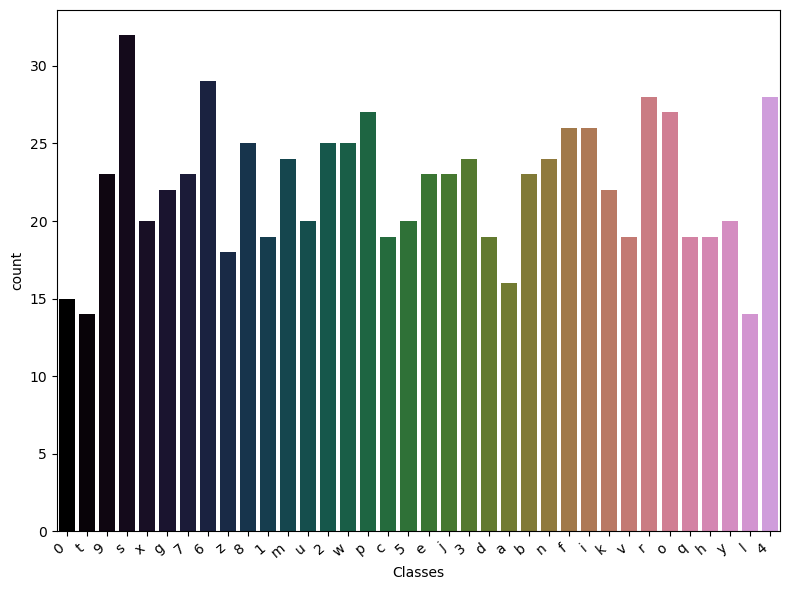

In [104]:
# Distribution of val_dataset classes
plot_class_distribution(val_dataset, class_names)

In [15]:
def image_iterator(dataset,batch_count=10):

    '''
    Summary :
    
        Splits the dataset to the image and
        labels batches
        
    Args    :

        dataset(tf.data.Dataset)             : Dataset to be splitted to the image and label batches
        batch_count(int)                     : The amount of batches for splitting 

    Returns :

        image_batches(list or numpy array)   : Dataset's splitted Batches which consist images
        label_batches(list or numpy array)   : Dataset's splitted Batches which consist class numbers
    '''
    # Lists of image and label batches
    image_batches = []
    label_batches = []

    # Looping through the batches to get first batch_count batches and collecting them
    for batch in dataset : 
        image_batch, label_batch = batch[0], batch[1]
        image_batches.append(image_batch)
        label_batches.append(label_batch)

        # Stopping if there is a predicated batch amount limit to collect
        if len(image_batches) == batch_count :
            break
    
    return image_batches, label_batches

In [17]:
# Splitting the train_dataset to image and label batches
image_train_batches, label_train_batches = image_iterator(train_dataset)

In [18]:
# Splitting the test_dataset to image and label batches
image_test_batches, label_test_batches = image_iterator(test_dataset)

In [19]:
# Splitting the val_dataset to image and label batches
image_val_batches, label_val_batches = image_iterator(val_dataset)

In [20]:
def split_batches_to_image_label_batch(image_batches, label_batches, class_names, batch_index):

    '''
    Summary :
    
        Takes a batch from both image and label batches at
        given index and change the class numbers to the 
        class names in the label batch for clearer understanding
        
    Args    :

        image_batches(list or numpy array)        : Dataset's splitted batches which consist images
        label_batches(list or numpy array)        : Dataset's splitted Batches which consist class numbers
        batch_index(int)                          : Chosen batch index to get
        class_names(list or numpy array)          : Name of the classes or labels of the images
        
    Returns :

        image_batch1(list or numpy array)         : Image batch from image_batches at the given index
        label_batch1(list or numpy array)         : Adjusted label batch from label_batches at the given index
    '''

    # Obtaining the batch at the given index from image_batches
    image_batch1 = image_batches[batch_index]

    # Obtaining the batch at the given index from label_batches and changing it class numbers to class names with indexing the class_names list
    label_batch1 = [class_names[x] for x in label_batches[batch_index]]

    return image_batch1, label_batch1
    

In [21]:
# Obtaining the image and label batches at index 0 from the train dataset
image_train_batch1 , label_train_batch1 = split_batches_to_image_label_batch(image_train_batches, label_train_batches, class_names, 0)

In [22]:
# Obtaining the image and label batches at index 0 from the test dataset
image_test_batch1 , label_test_batch1 = split_batches_to_image_label_batch(image_test_batches, label_test_batches, class_names, 0)

In [23]:
# Obtaining the image and label batches at index 0 from the validation dataset
image_val_batch1 , label_val_batch1 = split_batches_to_image_label_batch(image_val_batches, label_val_batches, class_names, 0)

In [130]:
def plot_grid_determiner(size):
    '''
    Summary :

        It determines the convienient (row x column) for
        make the plot aesthetically better. The amount
        of the rows and columns are determined respect to
        biggest 2 divisor of the 'size' for making
        rows' and columns' amounts close to each other if 
        'size' is bigger than 8, otherwise it determines
        just one row and all images are mapped there. Both
        situations are for getting aesthetically better plot.
        
    Args    :

        size(list or numpy array) : Size of the images to determine columns and rows count.
        
    Returns :

        row(int)                  : Lenght of the rows
        column(int)               : Lenght of the columns
    '''    
    # Determining just one row if the list size is lower than 8
    if size <= 8 :
        # Determining (1 x size) plot
        return 1, size 

    # Making the plot's rows and columns amounts close to each other in other conditions     
    else :
        # Taking the square root of the size to determine the biggest divisors of the size
        # And ceiling it to get an integer
        biggest_divisor = np.ceil((size)**(1/2))

        # Reducing the biggest_divisor and checking whether size is divisible by biggest_divisor every time for finding the biggest divisors
        while size // biggest_divisor != size / biggest_divisor :
            biggest_divisor +=  1

        # Determining the row and column after finding the biggest divisors(biggest_divisor is the biggest divisor and (list / size ) is the second biggest divisor)
        # (rows amounts' should be always smaller for aesthetical reasons)    
        row = size / biggest_divisor 
        col = biggest_divisor
    # Returning integer values because plt.subplots() expects rows' and columns' amounts as an integer
    return int(row), int(col)    

In [129]:
def show_images(images, labels, text='',  limitation=None):
    '''
    Summary :
    
        Takes  both images and labels list and display them 
        as image and it's class
        
    Args    :

        images(list or numpy array)           : Images list
        labels(list or numpy array)           : Images' classes
        limitation(int)                       : Limitation of the amount of the images to be displayed from the batch

    Returns :

        Plot of the images of image list and it's classes below them
    '''
    # Specifying the list size
    list_size = len(images)

    
    # Determining the best values for rows and columns with a function
    rows, cols = plot_grid_determiner(list_size) 

    # Creating the figure and axes
    fig, axs = plt.subplots(rows, cols, figsize=(12,8))
        
        
    # Adding a ttle to the figure
    fig.text(0.5, 0.9, text, ha='center', va='center', 
             fontsize=20)
    
    # Flatten the subplot array for easier indexing
    axs = axs.flatten()
    # Iterate over the images and display them in subplots
    for i, image in enumerate(images):
        # Scaling the matrix between 0-1 to get photo output at wanted quality respect to it's data type 
        # (because imshow() wants a input at this type) and adding each photo axis by axis to the figure
        if type(image) != np.ndarray : 
            axs[i].imshow(image.numpy()*1/255.0)
        else :
            axs[i].imshow(image*1/255.0)    
        # Removing the cartesian coordinate axes from the figure axis
        axs[i].axis('off')
        # Adding texts to the axes 
        axs[i].text(0.5, -0.1, labels[i] , color='white', backgroundcolor='black',
                transform=axs[i].transAxes, ha='center', va='top')
        # Stop if we reach the limitation of the image amount
        if i == limitation :
            break


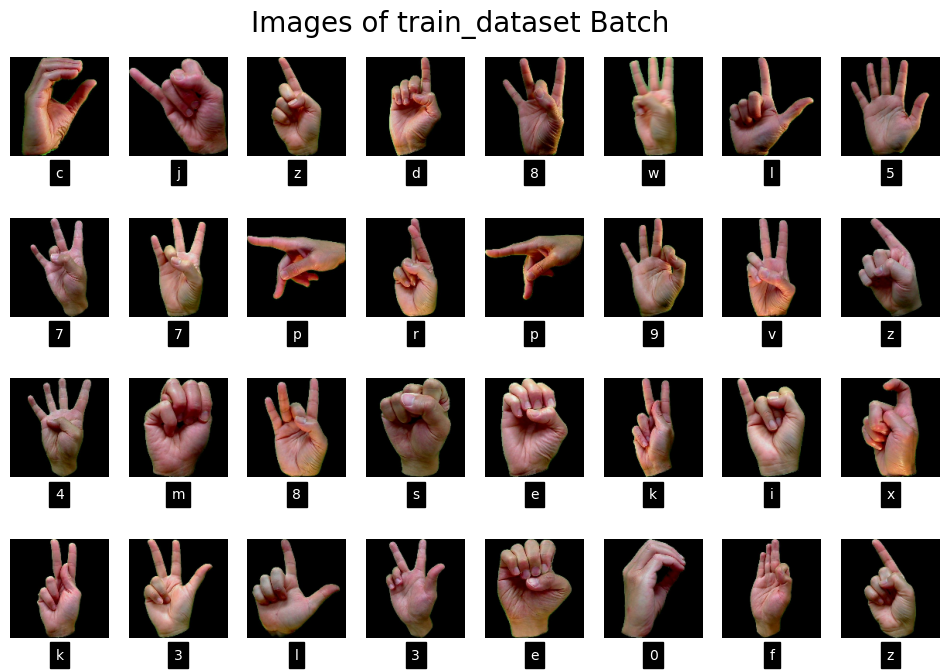

In [123]:
# Images and it's classes of train batch
show_images( images=image_train_batch1, labels=label_train_batch1, text='Images of train_dataset Batch')

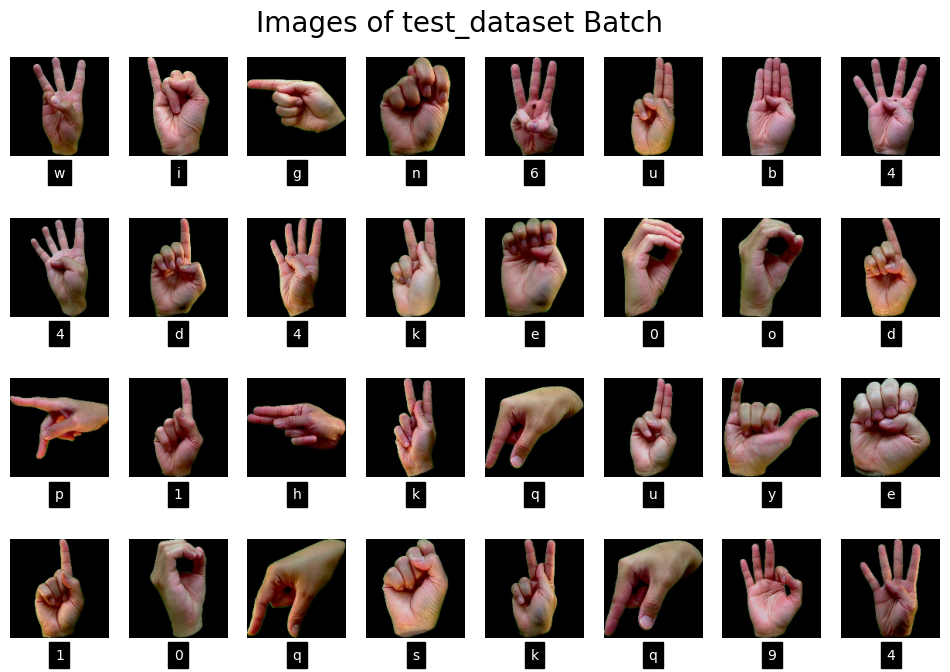

In [124]:
# Images and it's classes of test batch
show_images( images=image_test_batch1, labels=label_test_batch1, text='Images of test_dataset Batch')

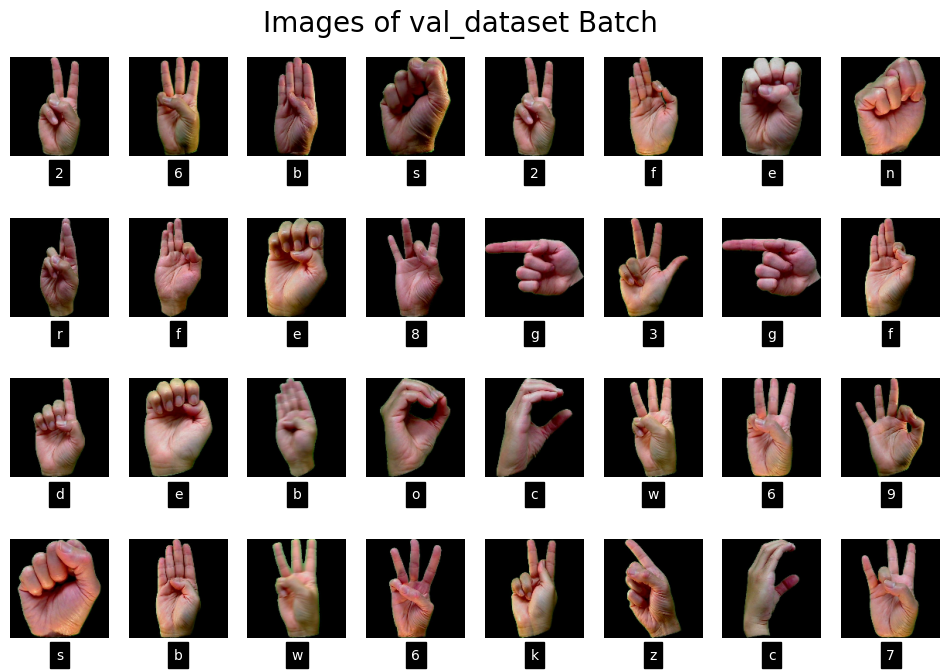

In [125]:
#Images and it's classes of validation batch
show_images( images=image_val_batch1, labels=label_val_batch1, text='Images of val_dataset Batch')

$$ \hspace{1.2cm}  $$
# <b> <span style="font-weight: 500; font-size: 40px;"> Finding Best Hyperparameters and Creating the Model Architecture </span></b>
$$ \hspace{1.2cm}  $$


$$ \hspace{1.2cm}  $$
$\Rightarrow$ Datasets should be prepared for efficent model training

In [25]:
# Making ready the train dataset for efficent training
train_dataset = train_dataset.unbatch().cache().shuffle(1000).batch(batch_size, drop_remainder=True).prefetch(buffer_size=AUTOTUNE)

In [26]:
# Making ready the validation dataset for efficent training
test_dataset = test_dataset.unbatch().cache().shuffle(1000).batch(batch_size, drop_remainder=True).prefetch(buffer_size=AUTOTUNE)

In [27]:
# Making ready the test dataset for efficent evulating the model
val_dataset = val_dataset.unbatch().cache().shuffle(1000).batch(batch_size, drop_remainder=True).prefetch(buffer_size=AUTOTUNE)

$$ \hspace{1.2cm}  $$
$\Rightarrow$ Making random data augmentations(rotation, zoom, contrast, noise ) and configurations for increasing model's ability of the catching complex features and efficency

In [131]:
preprocessing_layers = tf.keras.Sequential([
  tf.keras.layers.Resizing(128, 128),       # Model expects photos at size (128,128) so I am resizing the image for avoiding errors
  tf.keras.layers.RandomRotation(0.2),      # Changing Rotation of the images
  tf.keras.layers.Rescaling(1./255),        # Scaling the matrices between 0-1 for better training
  tf.keras.layers.RandomZoom(0.2),          # Zoom images
  tf.keras.layers.RandomContrast(0.2),      # Change contrast of images
  tf.keras.layers.GaussianNoise(stddev=0.1) # Adding noise to the data
])


$$ \hspace{1.2cm}  $$
$\Rightarrow$ Finding the best hyperparameters and the best model architecture with keras_tuner with the function down below

In [128]:
def build_model(hp):

    '''
    Summary :

        Builds a Keras Sequential model based on hyperparameters. The model is constructed using a series of Conv2D, 
        MaxPooling2D, (optional) BatchNormalization, (optional) Dropout layers, followed by a Flatten layer and two Dense layers. 
        Hyperparameters for the number of layers(the amount of the series which I mentioned at pervious sentence ), units in 
        each Conv2D layer, use of BatchNormalization, use of Dropout, rate of Dropout, units in the Dense layer, and 
        learning rate will be predicated respect to hyperparameter tuning.

    Args    :

        hp(keras_tuner.engine.hyperparameters.hyperparameters.HyperParameters) : keras_tuner's hyperparameter function to initalize probable hyperparameters 
                                                                                 which are specified down below.

    Returns :

        model(keras.engine.sequential.Sequential)                              : The deep learning solution's architecture to be configured. Configuration
                                                                                 will be based on hyperparameters

    '''
    # Model initializing
    model = Sequential()

    # Model's input layer(model expects photos at size (128,128))
    model.add(tf.keras.Input(shape=(128, 128, 3)))
    model.add(preprocessing_layers)

    # Creating serie of layers num_layers times
    for i in range(hp.Int("num_layers", 2, 4, default=3)):
        # Convolutional layer
        model.add(Conv2D(hp.Int(f"units_{i}", min_value=32, max_value=128, step=16, default=64), (3,3), padding="same", activation="relu"))
        # Pooling Layer
        model.add(MaxPooling2D((2, 2)))
        # Batch Normalization Layer
        if hp.Choice(f"batch_norm_{i}", [0, 1], default=0) == 1:
            model.add(BatchNormalization())
        # Dropout Layer    
        if hp.Choice(f"dropout_{i}", [0, 1], default=0) == 1:
            model.add(Dropout(hp.Float(f"dropout_rate_{i}", min_value=0.2, max_value=0.5, step=0.1, default=0.3)))
            
    # Dense Layers        
    model.add(Flatten()),
    model.add(Dense(hp.Int("dense_units", min_value=128, max_value=512, step=64, default=256), activation='relu'))
    model.add(Dense(36, activation='softmax'))  # 36 classes for sign language

    # Compiling the model
    model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=hp.Float("learning_rate", min_value=1e-5, max_value=1e-2, sampling="LOG", default=1e-3)),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                metrics=['accuracy'])
    return model

$$ \hspace{1.2cm}  $$
$\Rightarrow$ Some configurations for faster model training

In [129]:
# For stopping early when we converge to some accuracy to save time
early_stopping= EarlyStopping(monitor='val_loss', patience=6,start_from_epoch=3,restore_best_weights=True)
# For reducing the learning rate when we reach a plateau to not jumping over it and converge the local minimum value easily
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.15, patience=2, min_lr=1e-10, min_delta=0.0004,
                              mode='min')

$$ \hspace{1.2cm}  $$
$\Rightarrow$ Applying the function and getting the best model architectures and hyperparameters 

In [38]:
# The tuner will generate different versions of the model structure which is provided in the build_model function
# with different hyperparameter configurations according to again build_model function
build_model(keras_tuner.HyperParameters())

# Defining the hyperband tuner. 
# Hyperband is a type of tuner that performs random search over the hyperparameter space 
# but has a smarter sampling technique and early stopping strategy.
tuner = keras_tuner.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=50,
    factor=3,  
    directory='ASL_test0',
    project_name='sign_language0'
)

# This starts the hyperparameter search. The tuner will build and train models, adjusting the 
# hyperparameters according to the optimization strategy to improve 'val_accuracy'.
tuner.search(train_dataset, epochs=50, validation_data=val_dataset, batch_size=32,
             use_multiprocessing = True, workers = 8, verbose=1, callbacks = [early_stopping, reduce_lr])

# For checking the whether search is done 
print('level 5')

# Getting the best models and selecting the best one
models = tuner.get_best_models(num_models=3)
model = models[0]

# Printing top 3 best models
for i in range(len(models)):
    print(f"----------------------model{i}----------------------------")
    print(models[i].summary()) 

Trial 90 Complete [00h 08m 04s]
val_accuracy: 0.028750000521540642

Best val_accuracy So Far: 0.9312499761581421
Total elapsed time: 00h 18m 06s
INFO:tensorflow:Oracle triggered exit
level 5
----------------------model0----------------------------
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 48)        27696     
                                                                 
 max_p

In [133]:
# Best model's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 48)        27696     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 48)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 112)       4

$$ \hspace{1.2cm}  $$
# <b> <span style="font-weight: 500; font-size: 40px;">  Model Training </span></b>
$$ \hspace{1.2cm}  $$


$$ \hspace{1.2cm}  $$
$\Rightarrow$ Training the model

In [134]:
# Compiling the model
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate = 0.00033724),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                metrics=['accuracy'])

# Defining maximum epochs
epochs = 100

# Starting the model training and saving the results as a variable history
history = model.fit(
       train_dataset,
       epochs = epochs,
       validation_data = val_dataset,
       batch_size = batch_size,
       callbacks = [early_stopping, reduce_lr],
       verbose = 1)

Epoch 1/100
101/101 [==============================] - 9s 83ms/step - loss: 4.7527 - accuracy: 0.7555 - val_loss: 1.6612 - val_accuracy: 0.8687 - lr: 3.3724e-04
Epoch 2/100
101/101 [==============================] - 8s 80ms/step - loss: 8.4474 - accuracy: 0.7394 - val_loss: 8.5246 - val_accuracy: 0.7688 - lr: 3.3724e-04
Epoch 3/100
101/101 [==============================] - 8s 80ms/step - loss: 16.8065 - accuracy: 0.7285 - val_loss: 6.8844 - val_accuracy: 0.8537 - lr: 3.3724e-04
Epoch 4/100
101/101 [==============================] - 8s 80ms/step - loss: 12.1864 - accuracy: 0.8049 - val_loss: 3.9629 - val_accuracy: 0.8925 - lr: 5.0586e-05
Epoch 5/100
101/101 [==============================] - 8s 80ms/step - loss: 8.5060 - accuracy: 0.8447 - val_loss: 3.7258 - val_accuracy: 0.9013 - lr: 5.0586e-05
Epoch 6/100
101/101 [==============================] - 8s 81ms/step - loss: 8.0713 - accuracy: 0.8500 - val_loss: 3.0833 - val_accuracy: 0.9112 - lr: 7.5879e-06
Epoch 7/100
101/101 [===========

$$ \hspace{1.2cm}  $$
$\Rightarrow$ Saving and loading the model

In [ ]:
# Saving the model
model.save('ASL_best.h5')

In [28]:
# Loading the model
model = tf.keras.models.load_model('ASL_best.h5')

$$ \hspace{1.2cm}  $$
# <b> <span style="font-weight: 500; font-size: 40px;">  Testing the Model and Visualizing the Test Accuracy </span></b>
$$ \hspace{1.2cm}  $$


$$ \hspace{1.2cm}  $$
$\Rightarrow$ Setting up the functions for predicting the dataset and visualizing the predictions' accuracy

In [29]:
def get_actual_predicted_labels(dataset, model): 

    '''
    Summary :

        Predicts the given dataset with the given model 

    Args    :

        dataset(tf.data.Dataset)                      : Dataset to be predicted
        model(keras.engine.sequential.Sequential)     : Predictor model of the dataset

    Returns :

        actual(list or numpy array)                   : Dataset's labels
        predicted(list or numpy array)                : Predicted labels of dataset
    '''
    
    # Extracts the labels with that list comprehension. The list comprehension loops
    # over the 'dataset' and extracts the label from each tuple.
    actual = [labels for images, labels in dataset.unbatch()]

    #List of predicted labels from the dataset
    predicted = model.predict(dataset)

    # This line of code converts the list of labels 'actual' into a single tensor by stacking 
    # the elements of the list along a new axis to make comparable with the list 'predicted' 
    # and make ease of use for further use.
    actual = tf.stack(actual, axis=0)

    # This line of code concatenates the list of predictions 'predicted' into a single tensor along
    # the zero axis. Just like 'actual', this makes 'predicted' suitable for further computations
    # and for comparison with 'actual'.
    predicted = tf.concat(predicted, axis=0)
    
    # This line of code converts the 'predicted' tensor, which contains probabilities for each class,
    # into a tensor of class indices by picking the index of the maximum probability for each prediction.
    predicted = tf.argmax(predicted, axis=1)
    
    return actual, predicted

$$ \hspace{1.2cm}  $$
$\Rightarrow$ Visiulizing accuracy and confusion matrix

In [30]:
def plot_confusion_matrix(actual, predicted, ds_type, class_names):
    '''
    Summary :
    
        Plots the confusion matrix for a given set of actual and predicted labels. 

    Args    :
    
        actual (list or numpy array)     : A list or an array containing the actual class labels.
        predicted (list or numpy array)  : A list or an array containing the predicted class labels.
        ds_type (string)                 : A string indicating the type of dataset ('training', 'test', etc.) used in the title of the plot.
        class_names(list or numpy array) : Name of the classes or labels of the images
        
    Returns :
    
        A heatmap plot of the confusion matrix.
    '''
    #Creating the cınfusion matrix 
    cm = tf.math.confusion_matrix(actual, predicted, num_classes=num_classes)

    #Plot configurations(heatmap creating and pouring it to the ax, setting the title, x, y label name, position of the x and y values etc.)
    ax = sns.heatmap(cm, annot=True, fmt='g', cmap='viridis')
    sns.set(rc={'figure.figsize':(15, 15)})
    sns.set(font_scale=1.4)
    ax.set_title('Confusion matrix of ASL recognition for ' + ds_type)
    ax.set_xlabel('Predicted Class')
    ax.set_ylabel('Actual Class')
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    ax.xaxis.set_ticklabels(class_names)
    ax.yaxis.set_ticklabels(class_names)

In [30]:
#Model predictions on test data
actual, predicted = get_actual_predicted_labels(test_dataset, model)

32/32 [==============================] - 1s 20ms/step


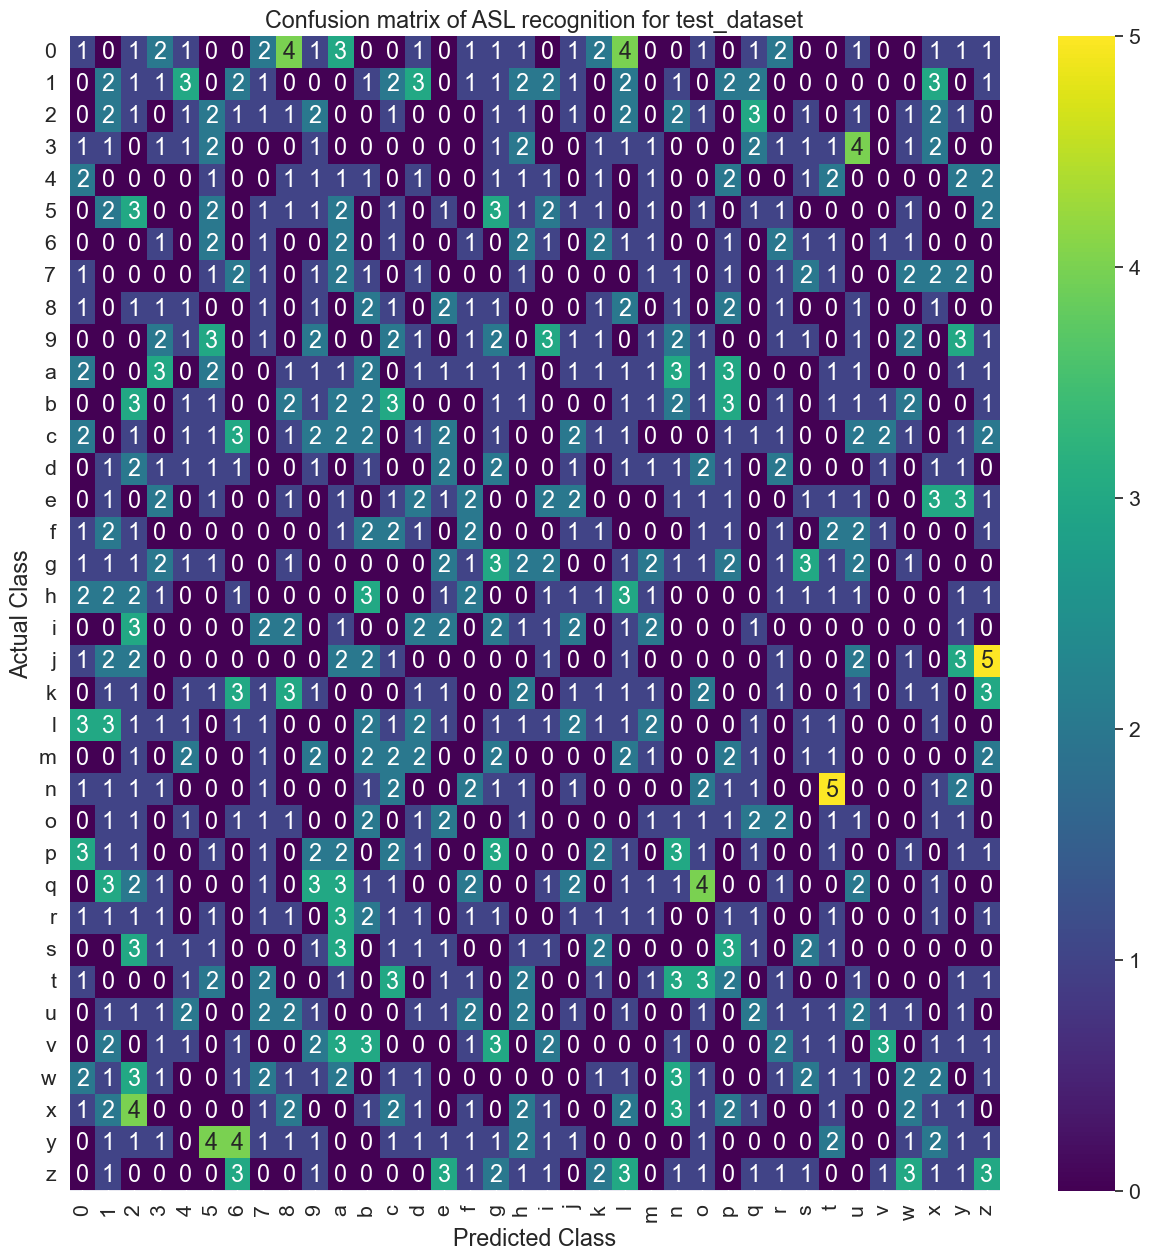

In [32]:
plot_confusion_matrix(actual, predicted, "test_dataset", class_names)

In [31]:
def plot_acc_loss(history, model, test_data):
    '''
    Summary :
    
        Plots the model's train and validation accuracies respect to changing
        epoch numbers. In addition, it prints the model's accuracy and loss on test data.

    Args    :
    
        history(keras.callbacks.History)          : Model's performance history.
        model(keras.engine.sequential.Sequential) : To learn the accuracy of the trained CNN arhitecture on the test data.
        test_data(tf.data.Dataset)                : Test dataset for measuring the model's performance on unseen data.

    Returns :
    
        Plot of training and validation accuracy respect to changing epochs and accuracy of the model on the test data.
    '''
    # Getting the train and validation accuracies from model performance history 
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    # Creating the figure and it's subplot
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    # Plotting accuracies at subplots
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    # Explaining the lines' meaning with legend
    plt.legend(loc='lower right')
    # Setting up the title of plot
    plt.title('Training and Validation Accuracy')

    #Model's loss and accuracy on test data
    loss, accuracy = model.evaluate(test_data)
    print(f'Test Accuracy : {accuracy} \n Test Loss : {loss}')
    

32/32 [==============================] - 1s 19ms/step - loss: 2.6420 - accuracy: 0.9169
Test Accuracy : 0.9169139266014099 
 Test Loss : 2.6420345306396484


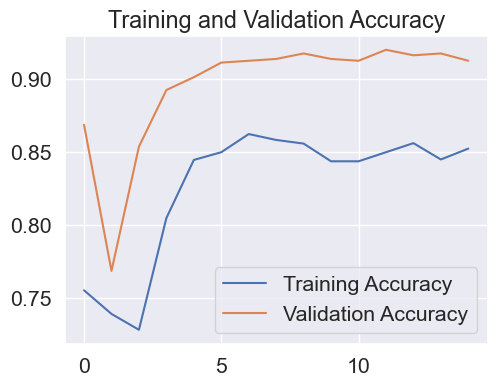

In [137]:
plot_acc_loss(history, model, test_dataset)

In [38]:
def batch_predictor(model, images, class_names) : 
    '''
    Summary :
    
        Predicts a image batch or list as individual not the whole batches.

    Args    :
    
        model(keras.engine.sequential.Sequential) : Predictor model of the batch
        images(list or numpy array)               : Images for predicting it's classes
        class_names(list or numpy array)          : Name of the classes or labels of the images

    Returns :
    
        Creates and shows a heatmap plot of the confusion matrix.
    '''
    predictions = []

    #Iterating over the images and predict them one by one
    for image in images:
        # Expanding dimensions to make compatable with the model's input if it is not compatable
        if len(image.shape) != 4 :
            image = np.expand_dims(image, axis=0) 
        else :
            pass
        #Prediction of the images one by one
        pred = model.predict(image)
        #Getting the most dominant which means most likeli class
        predicted_class = np.argmax(pred, axis=-1) 
        #Adding the predicted class to the list as an integer
        predictions.append(predicted_class)
    # Changing predicted class indexes to the class names with the list comprehension
    predictions = [class_names[x[0]] for x in predictions]
    
    return predictions

In [33]:
#Specifying a random batch index for visiulizing the model's performance on a arbitrary batch

#Picking a random integer between zero and length of the batch
random_batch_index = random.randrange(0,len(image_test_batches)+1)
random_batch_index

5

In [39]:
# Creating the image and test batch at random batch index with split_batches_to_image_label_batch() function
image_test_batch_rd, label_test_batch_rd = split_batches_to_image_label_batch(image_test_batches, label_test_batches, random_batch_index, class_names )

In [40]:
# Predicting the batch's labels' indexes one by one and changing them to the label names with the list comprehension
predictions = batch_predictor(model, image_test_batch_rd)

1/1 [==============================] - 0s 12ms/step


In [41]:
# Showing the first 9 elements of predictions list and it's lenght
predictions[:9], len(predictions)

(['w', 'i', 'x', 'w', 'c', 'r', '3', 's', '3'], 32)

In [95]:
# Creating a zeros list to be filled with red and greens(as strings) for spesification of correct and 
# false predictions for each index in the long term
predictions_correctness = [0]*len(predictions)

In [96]:
# Missclassified images count
missclassifed_images = 0
# Length of the images list for examining the correctness accuracy as ratio between missclassifed images and total images
total_images =len(predictions)

# Iterating over predictions and it's indexes for filling predictions_correctness list with green and reds 
for index, prediction in enumerate(predictions) :
    # Checking the correctness of predictions one by one and labeling them as green and reds in a different list with 
    # considering indexes of different list with considering indexes of predictions list
    if prediction == label_test_batch_rd[index]:
        predictions_correctness[index] = 'green'
        pass
    else :
        predictions_correctness[index] = 'red'
        missclassifed_images+=1         
# Printing the correctness labels(greens and reds) and accuracy          
print(predictions_correctness)
print(f'{missclassifed_images} images has been missclassifed out of {total_images}')

['green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'red', 'green', 'green', 'green']
1 images has been missclassifed out of 32


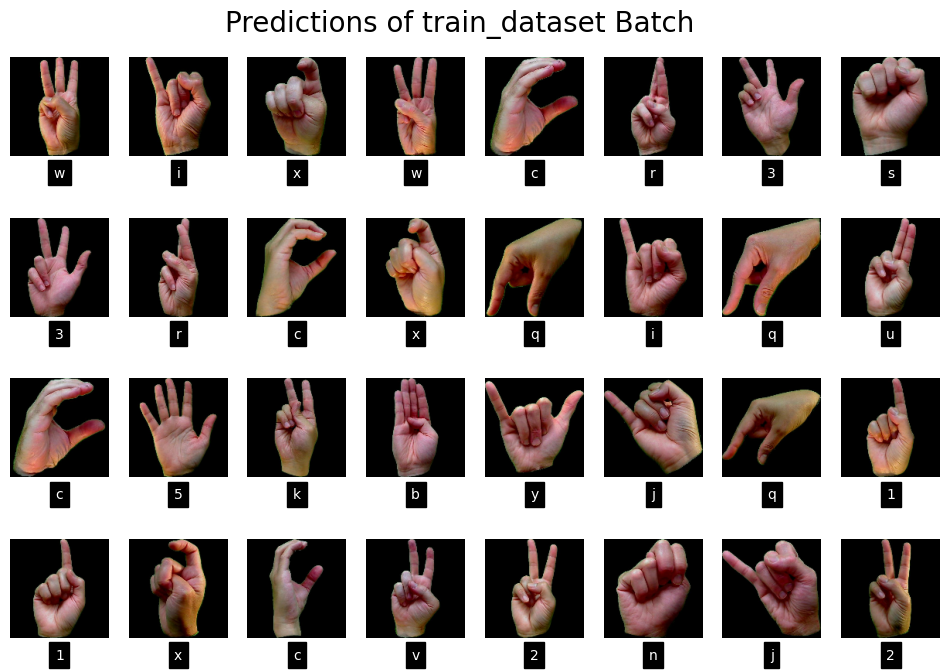

In [126]:
# Displaying the images of the batch and their predictions below them
show_images( images=image_test_batch_rd, labels=predictions, text='Predictions of train_dataset Batch')

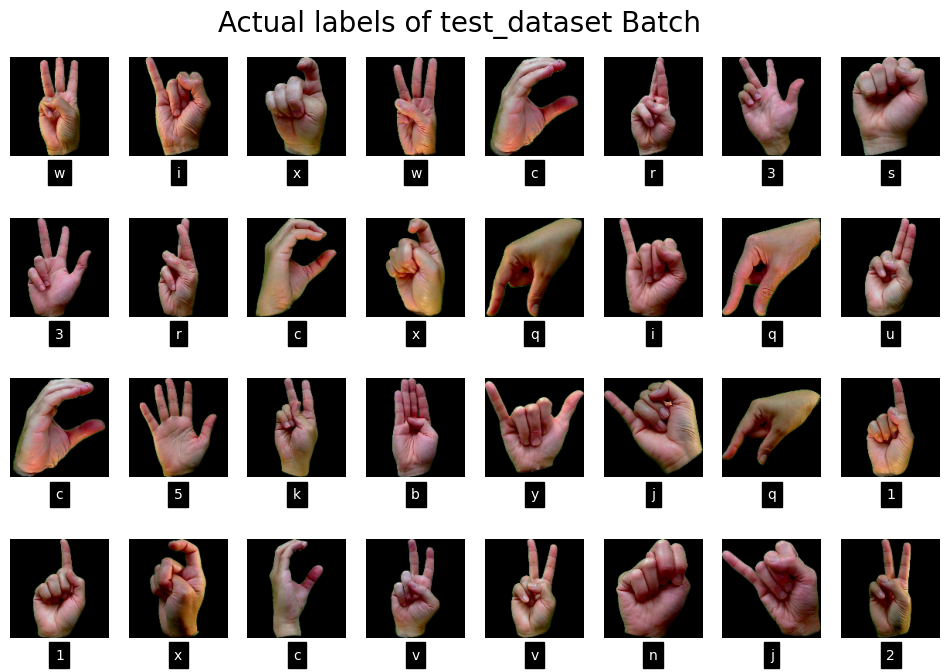

In [127]:
# Displaying the images of the batch and their actual classes below them
show_images( images=image_test_batch_rd, labels=label_test_batch_rd, text='Actual labels of test_dataset Batch')

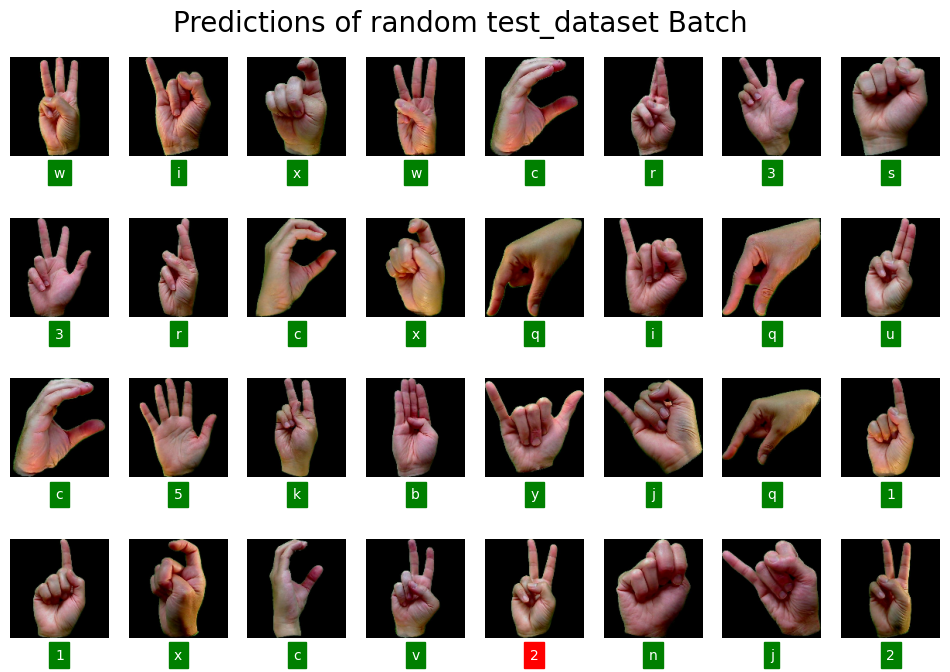

In [97]:
# Creating the figure and axes
fig, axs = plt.subplots(4, 8, figsize=(12, 8))
# Adding a title to the plot
fig.text(0.5, 0.9, 'Predictions of random test_dataset Batch', ha='center', va='center', 
             fontsize=20)
# Flattening the axes for easily indexing
axs = axs.flatten()
# Iterating over the image batch and it's indexes
for i, image in enumerate(image_test_batch_rd):
        # Displaying the images at wanted form
        axs[i].imshow(image.numpy()*1/255.0)
        # Removing the cartesian axes from the axes
        axs[i].axis('off')
        # Adding the predicted classes below the photos and changing the background color according to it's correctness, that is done with indexing 
        # prediction_correctness list
        axs[i].text(0.5, -0.1, predictions[i] , color='white', backgroundcolor=f'{predictions_correctness[i]}',
                transform=axs[i].transAxes, ha='center', va='top')

$$ \hspace{1.2cm}  $$
$\Rightarrow$ Testing the model on real world examples (With my own hand!)

In [34]:
# Specifying the folder path of the photos which will be read from pyhton 
folder_path = '/Users/onurdursun/Downloads/my_own_photos/'

In [35]:
# Extracting the files' list in the folder path I provided
file_list = os.listdir(folder_path)
# Sorting them for matching classes with the correct images, because classes' letters are o,n,u,r in order
file_list.sort()
# Showing them after sorting
file_list

['.DS_Store',
 '1_o_letter.jpg',
 '2_n_letter.jpg',
 '3_u_letter.jpg',
 '4_r_letter.jpg']

In [36]:
# Deleting the unnecessary hidden file name from the list
del file_list[0]

In [37]:
# Extracting the just letter parts from the file names for clearer display with splitting the file names at _.
# The splitting creates a list of three strings for example ['1','o','letter.jpg'] and the list comphresension takes 
# the 1. index from every file that index corresponds the letter.
label_names_1 = [i.split('_')[1] for i in file_list ]
label_names_1

['o', 'n', 'u', 'r']

In [43]:
# Images list, collected images will be added here
images = []

# Iterating over the file list
for file in file_list :
    # Reading the images with direct file path with cv2 color configuration(image will be in shades of blue)
    img = cv2.imread(f"{folder_path + file}", cv2.IMREAD_COLOR)
    # Resizing the image for making similar to batch images
    img_resized = cv2.resize(img, (128,128))
    # Changing image's color pattern to rgb
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
    # Adding the image in the list
    images.append(img_rgb)

In [105]:
def display_and_compare_images(images, actual_classes, predicted_classes):
    '''
    Summary :
    
        Plots the images which are passed into the function 
        and actual and predicted classes below them to compare
        the correctness of predictions.

    Args    :
    
        images(list or numpy array)            : Images to display in plot
        actual_classes(list or numpy_array)    : Actual classes of the images
        predicted_classes(list or numpy_array) : Predicted classes of the images

    Returns :
    
        Plot of images and their actualc classes' and labels' below them
    '''
    # Determining rows' and columns' amounts for aesthetically better plot
    rows , columns = plot_grid_determiner(len(images))
    # Creating the plot
    fig, axs       = plt.subplots(rows, columns,figsize=(10,8))
    
   # Iterating over the images and their indexes for writing the actual and predicted classes below the images
    for i, image in enumerate(images) :
        # Plotting the images
        axs[i].imshow(image)
        # Removing the cartesian axes for each axes
        axs[i].axis('off')
        # Adding the images' actual and predicted classes below them 
        axs[i].text(0.5, -0.1, f'Predicted Class: {predicted_classes[i]} \n Actual Class : {actual_classes[i]}' , color='white', backgroundcolor='black',
                transform=axs[i].transAxes, ha='center', va='top')       

    # Adjusting the subplot params so that subplots are nicely fit in the figure.
    plt.tight_layout() 
    # Displaying the plot
    plt.show() 

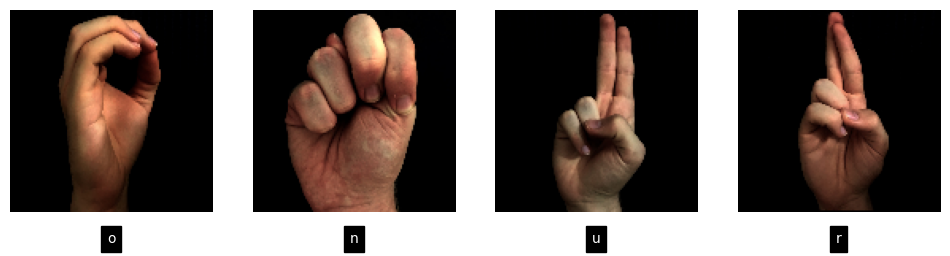

In [131]:
# Showing images of my hand gestures and their classes
show_images(images, label_names_1)

In [67]:
# Predicting the my hands gestures and showing the predictions
predicted_real_images = batch_predictor(model, images)
predicted_real_images

1/1 [==============================] - 0s 12ms/step


['o', 'n', 'u', 'r']

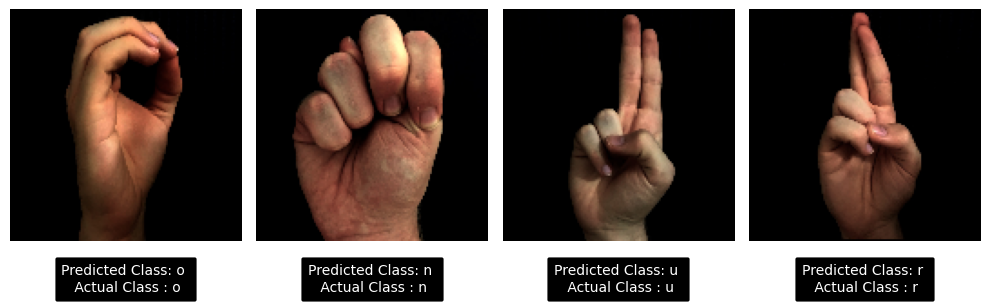

In [132]:
# Plotting the my hand gestures and comparing their actual classes and predicted classes
display_and_compare_images(images, label_names_1, predicted_real_images)